In [72]:
! git pull https://github.com/shane200195/Stock_ml.git

fatal: not a git repository (or any of the parent directories): .git


In [77]:
! ls
! cd Stock_ml
! git init
! git pull https://github.com/shane200195/Stock_ml.git

sample_data  Stock_ml
Reinitialized existing Git repository in /content/.git/
remote: Enumerating objects: 603, done.
remote: Counting objects: 100% (603/603), done.
remote: Compressing objects: 100% (596/596), done.
remote: Total 603 (delta 13), reused 597 (delta 7), pack-reused 0
Receiving objects: 100% (603/603), 23.35 MiB | 18.87 MiB/s, done.
Resolving deltas: 100% (13/13), done.
From https://github.com/shane200195/Stock_ml
 * branch            HEAD       -> FETCH_HEAD


In [89]:
import pandas as pd
import numpy as np

djia = pd.read_csv("djia_no_google.csv")
djia = djia.set_index("Date")


for column in djia.columns:
  djia[column + "Volatile?"] = [1 if abs(i) > 0.01 else 0 for i in djia[column]]

# feature selection
target = "MSFT" # stock we want to test correlation with
features = [i for i in djia.columns if "Volatile?" in i and target not in i] #selecting the columns with volatility

x = djia.loc[:,features].values
#selecting the target that will be used to classify a particular state
result = djia[target + "Volatile?"].values

#testing to see if the data fits
print(djia.loc["2006-01-03":"2006-01-25", "JNJVolatile?"])

Date
2006-01-03    0
2006-01-04    1
2006-01-05    0
2006-01-06    0
2006-01-09    0
2006-01-10    0
2006-01-11    0
2006-01-12    0
2006-01-13    0
2006-01-17    0
2006-01-18    0
2006-01-19    0
2006-01-20    0
2006-01-23    0
2006-01-24    1
2006-01-25    1
Name: JNJVolatile?, dtype: int64
0


In [87]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

print(principal_components)

[[ 1.37725063 -0.62519206]
 [ 1.30378101 -0.00291363]
 [ 1.90800993 -0.07505003]
 ...
 [-0.81789908  0.20181084]
 [ 1.18586053  0.80388642]
 [ 1.2976568   0.59038818]]


In [90]:
principalDf = pd.DataFrame(data = principal_components
             , columns = ['component 1', 'component 2'])

# converting the index of result
result = pd.DataFrame(data = result, columns=["Result"])
finalDf = pd.concat([principalDf, result], axis = 1)
print(finalDf)

      component 1  component 2  Result
0        1.377251    -0.625192       1
1        1.303781    -0.002914       0
2        1.908010    -0.075050       1
3        1.045533     0.049913       0
4        0.993899     0.080244       0
...           ...          ...     ...
5133    -0.695923    -0.116770       0
5134    -0.855045     0.436346       1
5135    -0.817899     0.201811       0
5136     1.185861     0.803886       1
5137     1.297657     0.590388       1

[5138 rows x 3 columns]


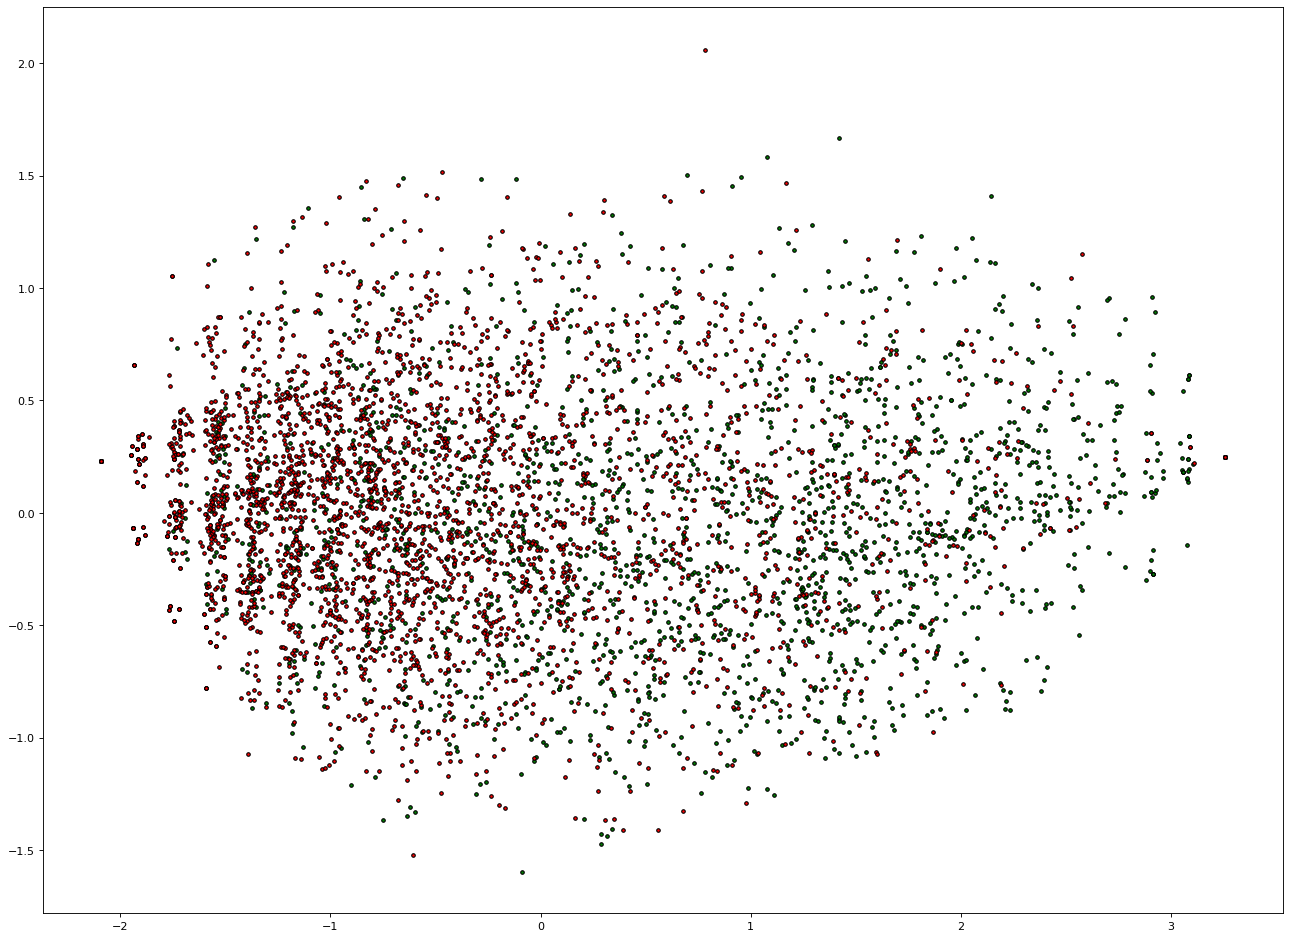

In [91]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
targets = [1, 0]
colors = ['g', 'r']

# graphing the data after PCA, the red color represents a 0 (low volatility), while the green represents a 1 (high volatility)
for target, color in zip(targets, colors):
  indicesToKeep = finalDf["Result"] == target
  plt.scatter(finalDf.loc[indicesToKeep, 'component 1']
               , finalDf.loc[indicesToKeep, 'component 2']
               , c = color
               , s = 10, edgecolor="k")
# plt.scatter(principalDf["component 1"], principalDf["component 2"])
plt.show()


Training SVM model for S&P500 dataset

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SVM_djia = SVC(gamma="auto")

# uses all stocks
X_train, X_test, y_train, y_test = train_test_split(x, result, test_size=0.5, random_state=42)

# stocks that have been component reduced
#X_train, X_test, y_train, y_test = train_test_split(finalDf.loc[:, ['component 1', 'component 2']].values, result, test_size=0.5, random_state=42)

SVM_djia.fit(X_train, y_train)

print(SVM_djia.score(X_train, y_train))
print(SVM_djia.score(X_test, y_test))





/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7318022576878163
0.7220708446866485


Training a KNN model for S&P500 dataset

In [94]:
from sklearn.neighbors import KNeighborsClassifier

KNN_djia = KNeighborsClassifier(n_neighbors=10)
KNN_djia.fit(X_train, y_train)
#predictions = KNN_sp500.predict(X_test)
#accuracy_score(predictions, y_test)
print(KNN_djia.score(X_train, y_train))
print(KNN_djia.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.7427014402491242
0.7103931490852472


Logistic Regression for S&P500 dataset

In [95]:
from sklearn.linear_model import LogisticRegression

LR_djia = LogisticRegression()
LR_djia.fit(X_train, y_train)

print(LR_djia.score(X_train, y_train))
print(LR_djia.score(X_test, y_test))



0.7236278707668353
0.7247956403269755


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [140]:
X_train = x[:split]
Y_train = result[:split]

X_test = x[split:]
Y_test = result[split:]

X_train_t = X_train[:, None]
X_test_t = X_test[:, None]
print(X_train[0].shape)

(29,)


Now we will try to build a recurrent neural network, with LSTM to see if it can fit the data better.

In [170]:
# we need to segregate the new data
split = 3500

X_train = x[:split]
Y_train = result[:split]

X_test = x[split:]
Y_test = result[split:]

#importing the modules needed for the neural network
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.layers import LSTM, GRU


X_train_t = X_train[:, None]
X_test_t = X_test[:, None]
K.clear_session()

model = Sequential()
#model.add(Dense(1))
model.add(Dense(1, input_shape=(29,)))
#model.add(LSTM(7, input_shape=(1, 29)))
model.add(Dense(1))


#Using Keras Callback
ES = EarlyStopping(monitor='val_loss')

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train,
         epochs=10, batch_size=1, verbose=1, callbacks=[ES], validation_data = (X_test, Y_test))

#model.fit(X_train_t, Y_train,
#         epochs=4, batch_size=1, verbose=1, validation_data = (X_test_t, Y_test))

y_train_lstm = model.predict_classes(X_train)
y_test_lstm = model.predict_classes(X_test)

print(accuracy_score(Y_train, y_train_lstm))
print(accuracy_score(Y_test, y_test_lstm))



"""
WE WILL USE THIS SECTION TO SEE HOW OUR MODEL VARIES:

OLD DATA:
loss = "mean_squared_error", epochs = 4, 2500/519 split
Train: 0.7256
Test: 0.7880539499036608

loss = "mean_squared_error", epochs = 4, 2500/519 split, lstm-units = 10
Train: 0.7276
Test: 0.7976878612716763

loss = "mean_absolute_error", epochs = 13, 2500/519 split
Train: 0.726
Test: 0.7861271676300579


NEW DATA (Added 2000 more sets of data):
loss = "mean_squared_error", epochs = CallBack-EarlyStopping, 3500/1638 split, lstm-units = 6, layers: LSTM-Dense

model.add(LSTM(6, input_shape=(1, 29)))
model.add(Dense(1))

Train: 0.714
Test: 0.7472527472527473

loss = "mean_squared_error", epochs = CallBack-EarlyStopping, 3500/1638 split, lstm-units = 6, layers: Dense-LSTM-Dense

model.add(Dense(1, input_shape=(1, 29)))
model.add(LSTM(6, input_shape=(1, 29)))
model.add(Dense(1))

Train: 0.712
Test: 0.7490842490842491

loss = "mean_squared_error", epochs = CallBack-EarlyStopping, 3500/1638 split, lstm-units = 6, layers: Dense-Dense

model.add(Dense(1, input_shape=(29,)))
model.add(Dense(1))

Train: 0.7088571428571429
Test: 0.7478632478632479


"""


5138
Train on 3500 samples, validate on 1638 samples
Epoch 1/10
3500/3500 [==============================] - 5s 1ms/step - loss: 0.2195 - val_loss: 0.1803
Epoch 2/10
3500/3500 [==============================] - 5s 1ms/step - loss: 0.2002 - val_loss: 0.1801
Epoch 3/10
3500/3500 [==============================] - 5s 1ms/step - loss: 0.1974 - val_loss: 0.1792
Epoch 4/10
3500/3500 [==============================] - 5s 1ms/step - loss: 0.1965 - val_loss: 0.1775
Epoch 5/10
3500/3500 [==============================] - 5s 1ms/step - loss: 0.1957 - val_loss: 0.1772
Epoch 6/10
3500/3500 [==============================] - 5s 1ms/step - loss: 0.1957 - val_loss: 0.1776
0.7088571428571429
0.7478632478632479


'\nWE WILL USE THIS SECTION TO SEE HOW OUR MODEL VARIES:\n\nOLD DATA:\nloss = "mean_squared_error", epochs = 4, 2500/519 split\nTrain: 0.7256\nTest: 0.7880539499036608\n\nloss = "mean_squared_error", epochs = 4, 2500/519 split, lstm-units = 10\nTrain: 0.7276\nTest: 0.7976878612716763\n\nloss = "mean_absolute_error", epochs = 13, 2500/519 split\nTrain: 0.726\nTest: 0.7861271676300579\n\n\nNEW DATA (Added 2000 more sets of data):\nloss = "mean_squared_error", epochs = CallBack-EarlyStopping, 3500/1638 split, lstm-units = 6, layers: LSTM-Dense\n\nmodel.add(LSTM(6, input_shape=(1, 29)))\nmodel.add(Dense(1))\n\nTrain: 0.714\nTest: 0.7472527472527473\n\nloss = "mean_squared_error", epochs = CallBack-EarlyStopping, 3500/1638 split, lstm-units = 6, layers: Dense-LSTM-Dense\n\nmodel.add(Dense(1, input_shape=(1, 29)))\nmodel.add(LSTM(6, input_shape=(1, 29)))\nmodel.add(Dense(1))\n\nTrain: 0.712\nTest: 0.7490842490842491\n\n\n\n'

We will now continue to experiement and attempt to improve upon our original model